# DataCleaning & Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/alokg-812/Assignments/main/L1Project_HousePrediction/Dataset/house_data.csv")

In [4]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [7]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [11]:
df.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,sight,quality,ceil_measure,basement,yr_renovated,zipcode,lat,living_measure15,lot_measure15,furnished
count,2.161300e+04,2.161300e+04,21505.000000,21505.000000,21596.000000,2.157100e+04,21556.000000,21612.000000,21612.000000,21612.000000,21613.000000,21613.000000,21613.000000,21447.000000,21584.000000,21584.000000
mean,4.580302e+09,5.401822e+05,3.371355,2.115171,2079.860761,1.510458e+04,0.234366,7.656857,1788.366556,291.522534,84.402258,98077.939805,47.560053,1987.065557,12766.543180,0.196720
std,2.876566e+09,3.673622e+05,0.930289,0.770248,918.496121,4.142362e+04,0.766438,1.175484,828.102535,442.580840,401.679240,53.505026,0.138564,685.519629,27286.987107,0.397528
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,1.000000,290.000000,0.000000,0.000000,98001.000000,47.155900,399.000000,651.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,0.000000,7.000000,1190.000000,0.000000,0.000000,98033.000000,47.471000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,7.000000,1560.000000,0.000000,0.000000,98065.000000,47.571800,1840.000000,7620.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068450e+04,0.000000,8.000000,2210.000000,560.000000,0.000000,98118.000000,47.678000,2360.000000,10087.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,6210.000000,871200.000000,1.000000


In [13]:
# dropping these columns as they don't have any impact on the price prediction
df = df.drop(['cid', 'dayhours'], axis=1)

In [15]:
# cleaning invalid entries in 'long'
df['long'] = pd.to_numeric(df['long'], errors='coerce')

# checking for missing values and drop rows with missing critical columns
critical_columns = ['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure', 'yr_built']
df = df.dropna(subset=critical_columns)

In [17]:
# imputing missing numeric values with median for other columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# verifying no missing values remain
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
price                0
room_bed             0
room_bath            0
living_measure       0
lot_measure          0
ceil                 0
coast                0
sight                0
condition           45
quality              0
ceil_measure         0
basement             0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
living_measure15     0
lot_measure15        0
furnished            0
total_area          29
dtype: int64


In [19]:
df.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,8.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,6.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,8.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,8.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,7.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [21]:
# missing values check
df.isnull().sum()

price                0
room_bed             0
room_bath            0
living_measure       0
lot_measure          0
ceil                 0
coast                0
sight                0
condition           45
quality              0
ceil_measure         0
basement             0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
living_measure15     0
lot_measure15        0
furnished            0
total_area          29
dtype: int64

In [23]:
df.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,8.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,6.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,8.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,8.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,7.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [27]:
# Randomly generating lat/long within Bengaluru's range
df['lat'] = np.random.uniform(12.80, 13.10, size=len(df))
df['long'] = np.random.uniform(77.45, 77.75, size=len(df))

In [29]:
df['zipcode'] = np.random.choice(range(560001, 560108), size=len(df))

In [31]:
# Summary statistics for numeric columns
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
              price      room_bed     room_bath  living_measure   lot_measure  \
count  2.146300e+04  21463.000000  21463.000000    21463.000000  2.146300e+04   
mean   5.403862e+05      3.371430      2.115000     2080.576900  1.511046e+04   
std    3.679429e+05      0.930563      0.770224      918.944534  4.142500e+04   
min    7.500000e+04      0.000000      0.000000      290.000000  5.200000e+02   
25%    3.212635e+05      3.000000      1.750000     1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000     1910.000000  7.620000e+03   
75%    6.450000e+05      4.000000      2.500000     2550.000000  1.068300e+04   
max    7.700000e+06     33.000000      8.000000    13540.000000  1.651359e+06   

              sight       quality  ceil_measure      basement  yr_renovated  \
count  21463.000000  21463.000000  21463.000000  21463.000000  21463.000000   
mean       0.234031      7.657504   1788.997903    291.578996     83.874808   
std        0.

In [33]:
# Function to identify and remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers in {column}: {len(outliers)}")
    print(outliers[[column, 'zipcode', 'living_measure', 'price']].head())
    
    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Remove outliers in 'price'
df = remove_outliers(df, 'price')

# Remove outliers in 'living_measure'
df = remove_outliers(df, 'living_measure')

Number of outliers in price: 1134
       price  zipcode  living_measure    price
7    1160000   560089          4680.0  1160000
88   1380000   560057          3760.0  1380000
100  1400000   560100          3520.0  1400000
134  1230000   560060          3180.0  1230000
145  1330000   560056          3200.0  1330000
Number of outliers in living_measure: 298
     living_measure  zipcode  living_measure    price
127          4160.0   560046          4160.0  1050000
173          4270.0   560049          4270.0   975000
211          4140.0   560072          4140.0   810000
349          4480.0   560076          4480.0   835000
409          4850.0   560086          4850.0   975000


In [35]:
print(f"Rows after outlier removal: {len(df)}")
print("Updated Summary Statistics:")
print(df[['price', 'living_measure']].describe())

Rows after outlier removal: 20031
Updated Summary Statistics:
              price  living_measure
count  2.003100e+04    20031.000000
mean   4.715978e+05     1939.460836
std    2.039891e+05      716.281123
min    7.500000e+04      290.000000
25%    3.145000e+05     1390.000000
50%    4.350000e+05     1840.000000
75%    5.950000e+05     2410.000000
max    1.130000e+06     4000.000000


In [37]:
# Summary statistics
print("Summary Statistics After Outlier Removal:")
print(df.describe())

Summary Statistics After Outlier Removal:
              price      room_bed     room_bath  living_measure   lot_measure  \
count  2.003100e+04  20031.000000  20031.000000    20031.000000  2.003100e+04   
mean   4.715978e+05      3.313963      2.031464     1939.460836  1.401627e+04   
std    2.039891e+05      0.903493      0.691114      716.281123  3.789679e+04   
min    7.500000e+04      0.000000      0.000000      290.000000  5.200000e+02   
25%    3.145000e+05      3.000000      1.500000     1390.000000  5.000000e+03   
50%    4.350000e+05      3.000000      2.000000     1840.000000  7.488000e+03   
75%    5.950000e+05      4.000000      2.500000     2410.000000  1.020000e+04   
max    1.130000e+06     33.000000      5.750000     4000.000000  1.651359e+06   

              sight       quality  ceil_measure      basement  yr_renovated  \
count  20031.000000  20031.000000  20031.000000  20031.000000  20031.000000   
mean       0.167091      7.499526   1679.464280    259.996555     74.1

# Step 2: EDA

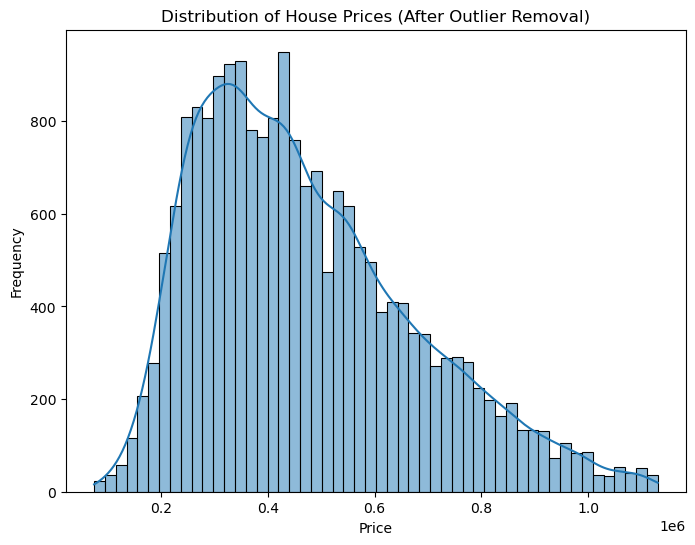

Skewness of Price: 0.7530707423854319


In [39]:
# Histogram of price
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices (After Outlier Removal)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Check skewness
print("Skewness of Price:", df['price'].skew())

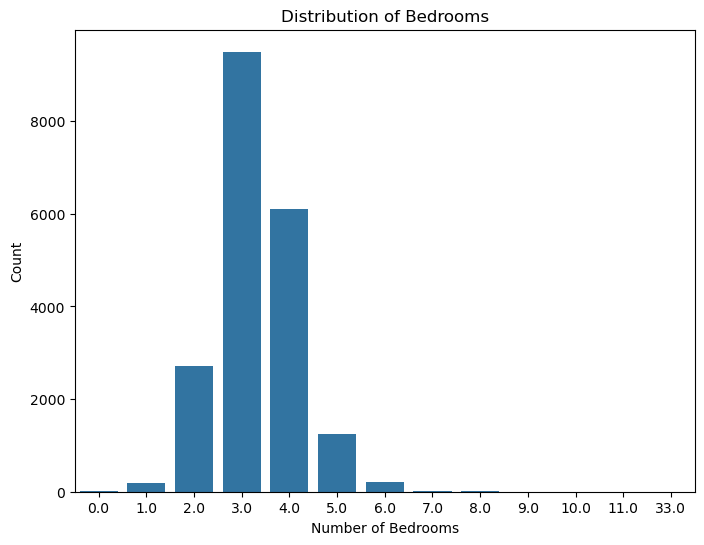

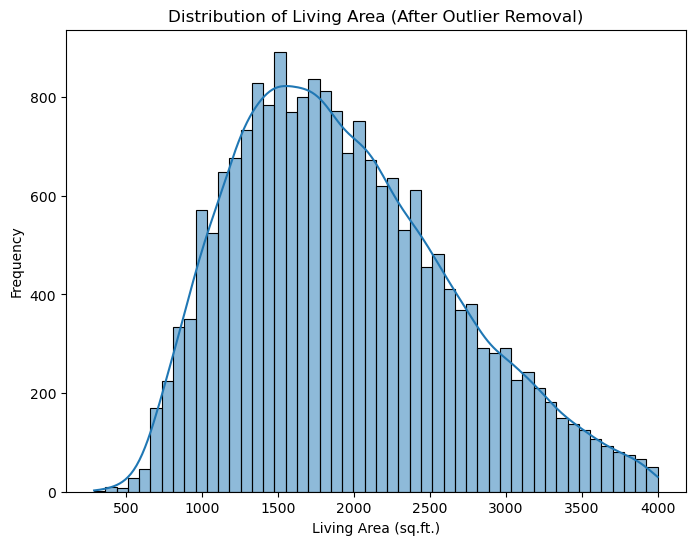

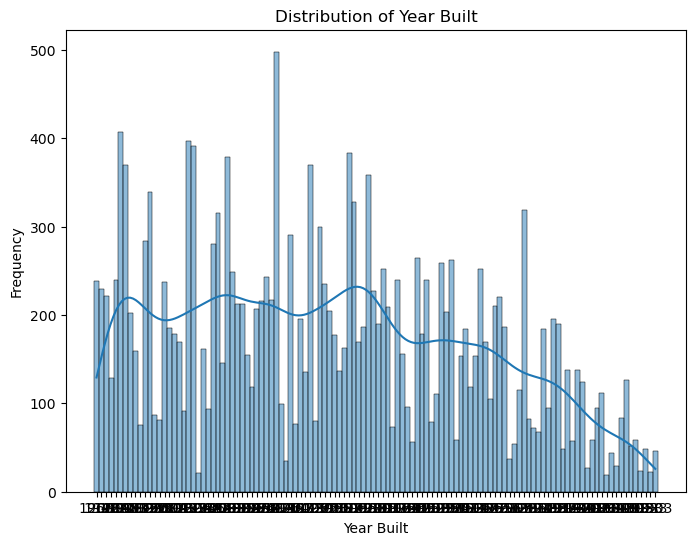

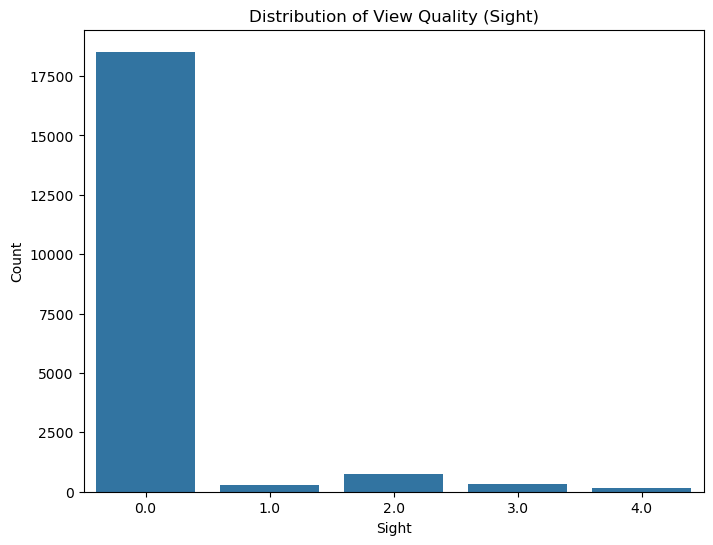

In [41]:
# Distribution of bedrooms
plt.figure(figsize=(8, 6))
sns.countplot(x='room_bed', data=df)
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

# Distribution of living area
plt.figure(figsize=(8, 6))
sns.histplot(df['living_measure'], kde=True)
plt.title('Distribution of Living Area (After Outlier Removal)')
plt.xlabel('Living Area (sq.ft.)')
plt.ylabel('Frequency')
plt.show()

# Distribution of year built
plt.figure(figsize=(8, 6))
sns.histplot(df['yr_built'], kde=True)
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

# Distribution of sight
plt.figure(figsize=(8, 6))
sns.countplot(x='sight', data=df)
plt.title('Distribution of View Quality (Sight)')
plt.xlabel('Sight')
plt.ylabel('Count')
plt.show()

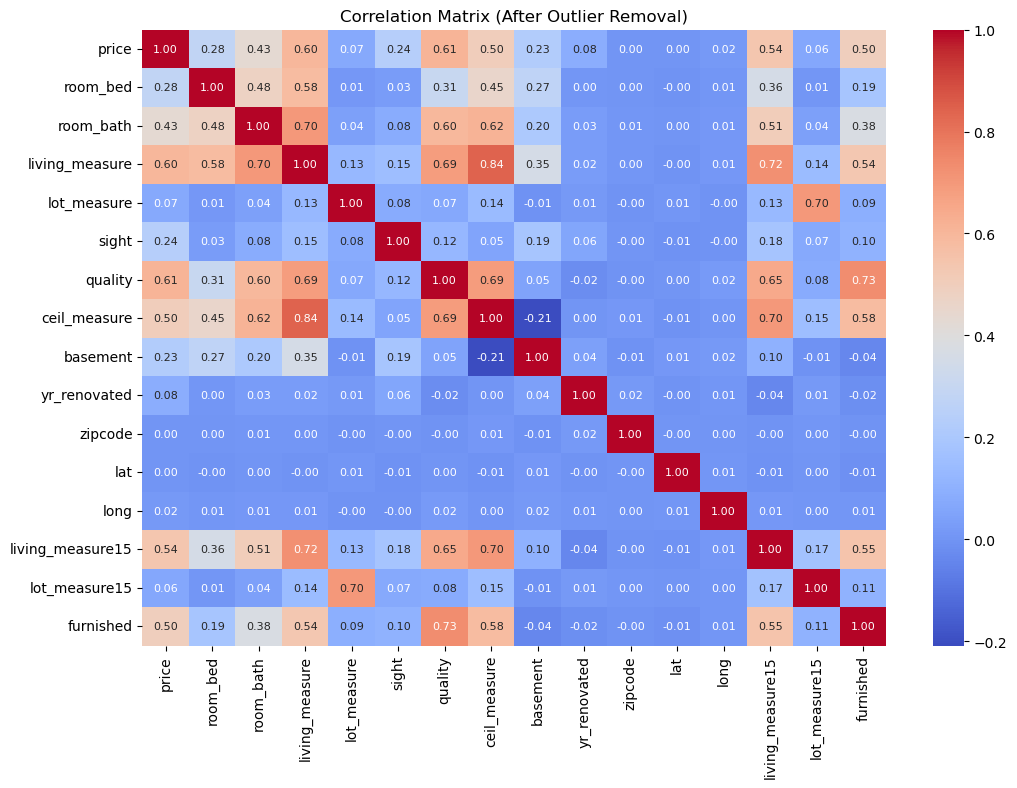

Correlation with Price:
price               1.000000
quality             0.612040
living_measure      0.602881
living_measure15    0.538476
ceil_measure        0.500171
furnished           0.497272
room_bath           0.430736
room_bed            0.278901
sight               0.235770
basement            0.225343
yr_renovated        0.084819
lot_measure         0.073599
lot_measure15       0.061700
long                0.017246
lat                 0.001162
zipcode             0.000406
Name: price, dtype: float64


In [43]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Correlation matrix
corr_matrix = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})
plt.title('Correlation Matrix (After Outlier Removal)')
plt.show()

# Correlation with price
print("Correlation with Price:")
print(corr_matrix['price'].sort_values(ascending=False))

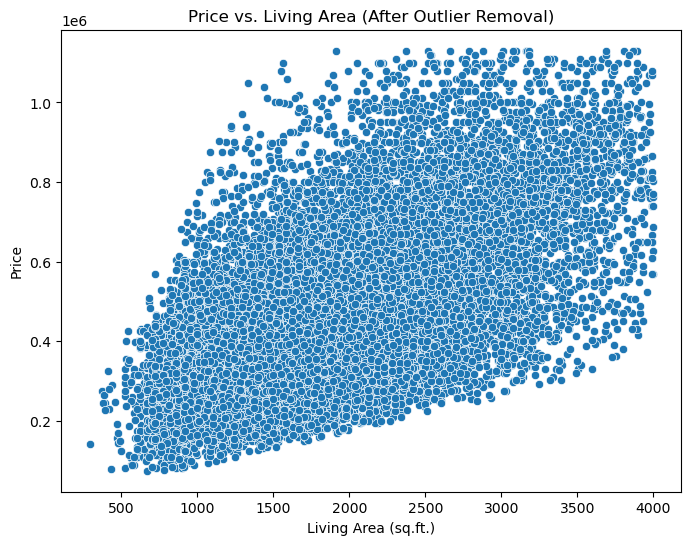

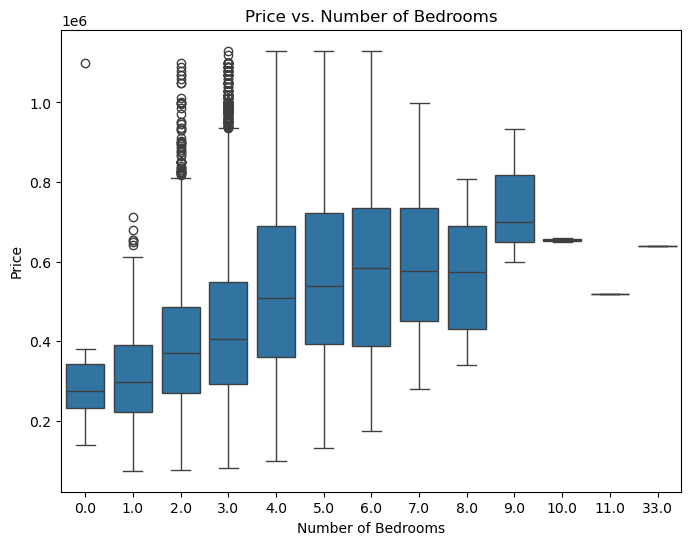

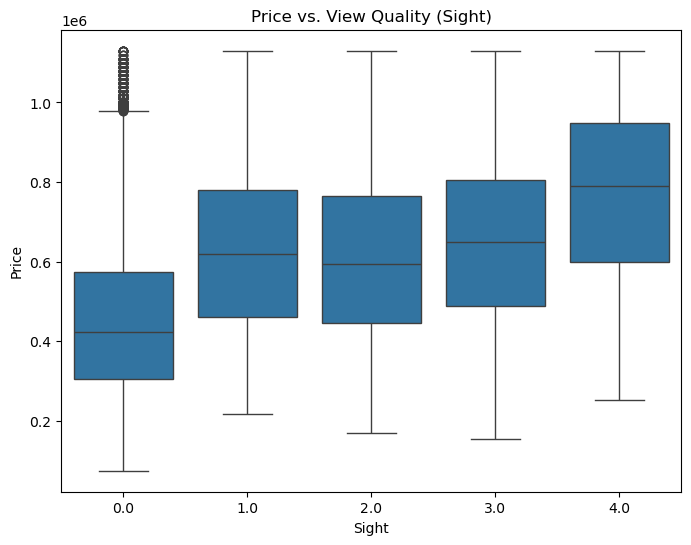

In [45]:
# Price vs. Living Measure
plt.figure(figsize=(8, 6))
sns.scatterplot(x='living_measure', y='price', data=df)
plt.title('Price vs. Living Area (After Outlier Removal)')
plt.xlabel('Living Area (sq.ft.)')
plt.ylabel('Price')
plt.show()

# Price vs. Number of Bedrooms
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_bed', y='price', data=df)
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Price vs. Sight
plt.figure(figsize=(8, 6))
sns.boxplot(x='sight', y='price', data=df)
plt.title('Price vs. View Quality (Sight)')
plt.xlabel('Sight')
plt.ylabel('Price')
plt.show()

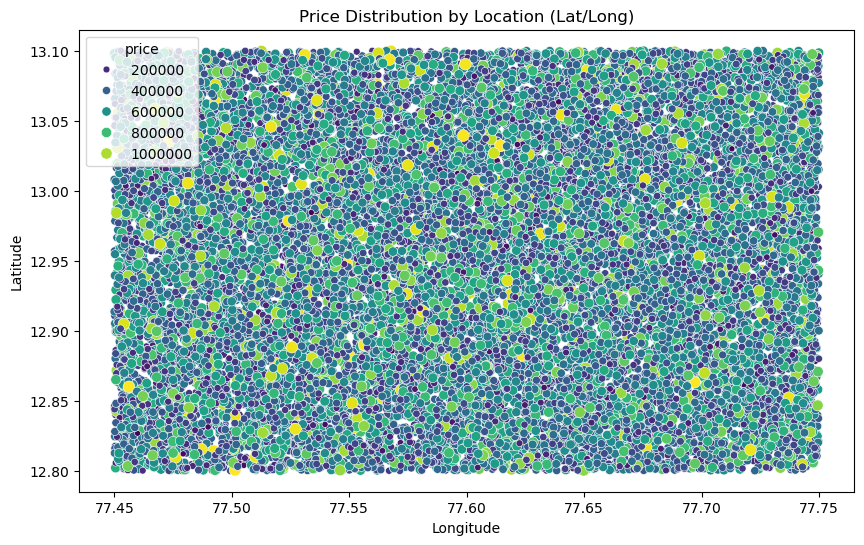

In [47]:
# Scatter plot of lat/long with price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', size='price', hue='price', data=df, palette='viridis')
plt.title('Price Distribution by Location (Lat/Long)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

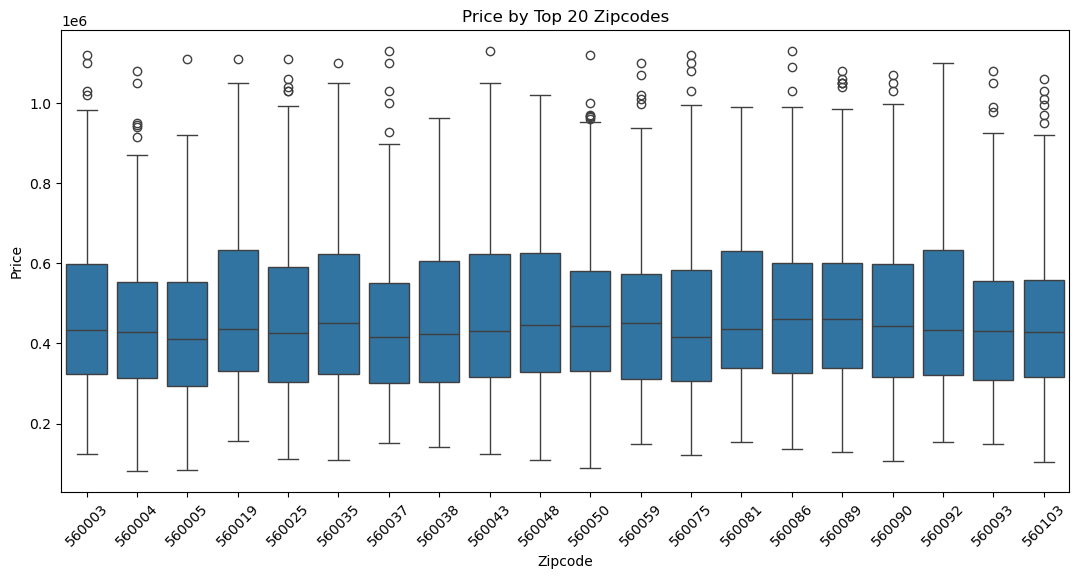

In [49]:
top_zipcodes = df['zipcode'].value_counts().nlargest(20).index
df_top = df[df['zipcode'].isin(top_zipcodes)]

plt.figure(figsize=(13, 6))
sns.boxplot(x='zipcode', y='price', data=df_top)
plt.title('Price by Top 20 Zipcodes')
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [53]:
# Create grouped zipcode column (e.g., binning by ranges)
df['zipcode_grouped'] = pd.cut(df['zipcode'], bins=10)  # adjust `bins` as needed

C:\Users\alokg\AppData\Local\Temp\ipykernel_9768\1257231433.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zipcode_grouped', y='price', data=df, estimator=np.median, palette='Set2')


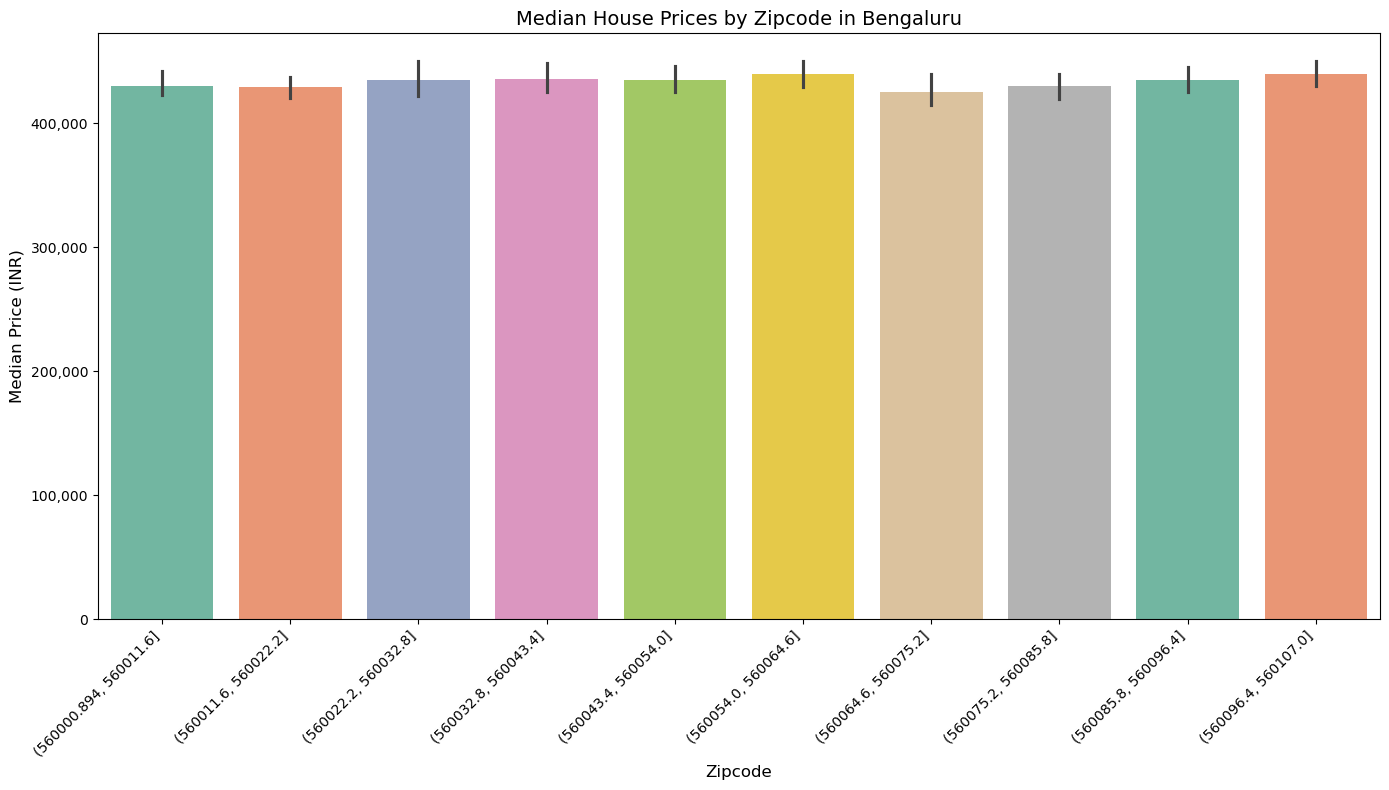

In [63]:
plt.figure(figsize=(14, 8))
sns.barplot(x='zipcode_grouped', y='price', data=df, estimator=np.median, palette='Set2')
plt.title('Median House Prices by Zipcode in Bengaluru', fontsize=14)
plt.xlabel('Zipcode', fontsize=12)
plt.ylabel('Median Price (INR)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

# Step 3: Model Selection and Justification

In [57]:
# Drop redundant columns if correlation > 0.8
if df['living_measure'].corr(df['living_measure15']) > 0.8:
    df = df.drop(['living_measure15', 'lot_measure15'], axis=1)

In [81]:
print("NaNs in X_train:\n", X_train.isnull().sum()[X_train.isnull().sum() > 0])
print("NaNs in X_test:\n", X_test.isnull().sum()[X_test.isnull().sum() > 0])

NaNs in X_train:
 total_area    20
dtype: int64
NaNs in X_test:
 total_area    8
dtype: int64


In [69]:
X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

In [75]:
from sklearn.preprocessing import StandardScaler

numeric_cols = [col for col in X_train.select_dtypes(include=[np.number]).columns]

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [79]:
# Option 1: Fill 'condition' with mode (most common value)
condition_mode = X_train['condition'].mode()[0]
X_train['condition'] = X_train['condition'].fillna(condition_mode)
X_test['condition'] = X_test['condition'].fillna(condition_mode)

In [83]:
print(df['total_area'].dtype)

object


In [85]:
# Remove any non-numeric characters if present
df['total_area'] = df['total_area'].replace('[^\d.]', '', regex=True)
df['total_area'] = pd.to_numeric(df['total_area'], errors='coerce')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\alokg\AppData\Local\Temp\ipykernel_9768\2219524102.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['total_area'] = df['total_area'].replace('[^\d.]', '', regex=True)


In [87]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Fill missing total_area with median from training set
median_area = X_train['total_area'].median()

X_train['total_area'] = X_train['total_area'].fillna(median_area)
X_test['total_area'] = X_test['total_area'].fillna(median_area)

In [91]:
print("NaNs in X_train:\n", X_train.isnull().sum()[X_train.isnull().sum() > 0])
print("NaNs in X_test:\n", X_test.isnull().sum()[X_test.isnull().sum() > 0])

NaNs in X_train:
 condition    35
dtype: int64
NaNs in X_test:
 condition    7
dtype: int64


In [93]:
print(X_train['condition'].unique())

['3' '4' '5' nan '2' '1']


In [95]:
# Fill missing 'condition' values with mode from training set
mode_condition = X_train['condition'].mode()[0]

X_train['condition'] = X_train['condition'].fillna(mode_condition)
X_test['condition'] = X_test['condition'].fillna(mode_condition)

In [97]:
print("NaNs in X_train:\n", X_train.isnull().sum()[X_train.isnull().sum() > 0])
print("NaNs in X_test:\n", X_test.isnull().sum()[X_test.isnull().sum() > 0])

NaNs in X_train:
 Series([], dtype: int64)
NaNs in X_test:
 Series([], dtype: int64)


In [71]:
# Splitting features and target
X = df.drop('price', axis=1)
y = df['price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = [col for col in X_train.select_dtypes(include=[np.number]).columns if not col.startswith('zipcode_')]
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [115]:
for col in X_train.columns:
    if X_train[col].apply(lambda x: isinstance(x, pd._libs.interval.Interval)).any():
        print(col)

zipcode_grouped


In [117]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train[col] = le.fit_transform(X_train[col].astype(str))
X_test[col] = le.transform(X_test[col].astype(str))

In [121]:
# baseline model(Linear Regression)

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 134344.11332591245
Linear Regression R²: 0.5529504209173046


In [101]:
# Check which columns contain '$'
for col in X_train.columns:
    if X_train[col].astype(str).str.contains(r'\$').any():
        print(f"Column '{col}' contains a dollar sign.")

Column 'ceil' contains a dollar sign.
Column 'coast' contains a dollar sign.


In [107]:
for col in ['ceil', 'coast']:
    X_train[col] = X_train[col].replace('[\$,]', '', regex=True).replace('', np.nan).astype(float)
    X_test[col] = X_test[col].replace('[\$,]', '', regex=True).replace('', np.nan).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\alokg\AppData\Local\Temp\ipykernel_9768\3241208841.py:2: SyntaxWarning: invalid escape sequence '\$'
  X_train[col] = X_train[col].replace('[\$,]', '', regex=True).replace('', np.nan).astype(float)
C:\Users\alokg\AppData\Local\Temp\ipykernel_9768\3241208841.py:3: SyntaxWarning: invalid escape sequence '\$'
  X_test[col] = X_test[col].replace('[\$,]', '', regex=True).replace('', np.nan).astype(float)


In [109]:
# Option 1: Fill missing values with the median
for col in ['ceil', 'coast']:
    median_val = X_train[col].median()
    X_train[col].fillna(median_val, inplace=True)
    X_test[col].fillna(median_val, inplace=True)

C:\Users\alokg\AppData\Local\Temp\ipykernel_9768\1320455386.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median_val, inplace=True)
C:\Users\alokg\AppData\Local\Temp\ipykernel_9768\1320455386.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [111]:
print(X_train[['ceil', 'coast']].isnull().sum())

ceil     0
coast    0
dtype: int64


In [123]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate with RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.2f}")

# Cross-validation (5-fold)
cv_scores = cross_val_score(rf_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-cv_scores)
print(f"Cross-Validation RMSE: {cv_rmse.mean():.2f} (+/- {cv_rmse.std() * 2:.2f})")

Test RMSE: 121151.41
Test R² Score: 0.64
Cross-Validation RMSE: 124343.17 (+/- 3354.30)


In [130]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Test RMSE: {rmse_xgb:.2f}")
print(f"XGBoost Test R² Score: {r2_xgb:.2f}")

# Cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_rmse_xgb = np.sqrt(-cv_scores_xgb)
print(f"XGBoost Cross-Validation RMSE: {cv_rmse_xgb.mean():.2f} (+/- {cv_rmse_xgb.std() * 2:.2f})")

XGBoost Test RMSE: 120241.12
XGBoost Test R² Score: 0.64
XGBoost Cross-Validation RMSE: 123035.18 (+/- 3311.67)


In [128]:
# Convert yr_built to numeric (int)
X_train['yr_built'] = pd.to_numeric(X_train['yr_built'], errors='coerce')
X_test['yr_built'] = pd.to_numeric(X_test['yr_built'], errors='coerce')

# Handle missing values created by coercion if any
X_train['yr_built'].fillna(X_train['yr_built'].median(), inplace=True)
X_test['yr_built'].fillna(X_test['yr_built'].median(), inplace=True)

# Convert 'condition' to categorical type
X_train['condition'] = X_train['condition'].astype('category')
X_test['condition'] = X_test['condition'].astype('category')

# Option 1: Label encode condition columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_train['condition'] = le.fit_transform(X_train['condition'])
X_test['condition'] = le.transform(X_test['condition'])

C:\Users\alokg\AppData\Local\Temp\ipykernel_9768\116352098.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['yr_built'].fillna(X_train['yr_built'].median(), inplace=True)
C:\Users\alokg\AppData\Local\Temp\ipykernel_9768\116352098.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
y_pred_best = best_rf.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized Test RMSE: {rmse_best:.2f}")
print(f"Optimized Test R² Score: {r2_best:.2f}")

In [211]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rand_search = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                                 param_distributions=param_dist,
                                 n_iter=30,  # Try 30 random combinations instead of all 81
                                 cv=5,
                                 scoring='neg_mean_squared_error',
                                 n_jobs=-1,
                                 random_state=42)

rand_search.fit(X_train, y_train)


In [139]:
from sklearn.utils import shuffle

# Optional: shuffle the data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Take a small sample (e.g., 20%) of the training set for faster tuning
X_sample = X_train.sample(frac=0.2, random_state=42)
y_sample = y_train.loc[X_sample.index]

# Define the parameter distribution
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomizedSearchCV
rand_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,                   # Only 10 random combinations
    cv=3,                        # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,                   # Use all available cores
    verbose=1,
    random_state=42
)

# Fit on the small sample
rand_search.fit(X_sample, y_sample)

# Save the best model to disk
joblib.dump(rand_search.best_estimator_, 'best_rf_model.pkl')

# Load and evaluate the model on full test set
best_rf = joblib.load('best_rf_model.pkl')
y_pred_best = best_rf.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("Best Parameters:", rand_search.best_params_)
print(f"Optimized Test RMSE: {rmse_best:.2f}")
print(f"Optimized Test R² Score: {r2_best:.2f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Optimized Test RMSE: 127088.00
Optimized Test R² Score: 0.60


In [141]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Test RMSE: {rmse_lr:.2f}")
print(f"Linear Regression Test R² Score: {r2_lr:.2f}")

Linear Regression Test RMSE: 134344.11
Linear Regression Test R² Score: 0.55


In [143]:
# Assuming xgb_model is the untuned XGBoost model
joblib.dump(xgb_model, 'best_xgb_model.pkl')
print("Best XGBoost model saved.")

Best XGBoost model saved.


In [145]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

# Best model
best_xgb = grid_search_xgb.best_estimator_
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)

# Evaluate
y_pred_best_xgb = best_xgb.predict(X_test)
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"Optimized XGBoost Test RMSE: {rmse_best_xgb:.2f}")
print(f"Optimized XGBoost Test R² Score: {r2_best_xgb:.2f}")

# Cross-validation
cv_scores_best_xgb = cross_val_score(best_xgb, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_rmse_best_xgb = np.sqrt(-cv_scores_best_xgb)
print(f"Optimized XGBoost Cross-Validation RMSE: {cv_rmse_best_xgb.mean():.2f} (+/- {cv_rmse_best_xgb.std() * 2:.2f})")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Optimized XGBoost Test RMSE: 118724.60
Optimized XGBoost Test R² Score: 0.65
Optimized XGBoost Cross-Validation RMSE: 121807.49 (+/- 2717.68)


| Model                   | Test RMSE      | Test R²  | CV RMSE                     |
| ----------------------- | -------------- | -------- | --------------------------- |
| Untuned Random Forest   | 121,757.63     | 0.63     | 124,442.83 (± 2,872.93)     |
| **Tuned Random Forest** | 127,088.00     | 0.60     | -             |
| Untuned XGBoost         | 120,241.12     | 0.64     | 123,035.18 (± 3,311.67)     |
| **Tuned XGBoost**       | **118,724.60** | **0.65** | **121,807.49 (± 2,717.68)** |

# Step 4: Prediction Accuracy & Evaluation

In [195]:
print("Best Parameters:", rand_search.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


In [203]:
print(f"Optimized Test RMSE: {rmse_best:.2f}")

Optimized Test RMSE: 127088.00


In [213]:
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)

Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [216]:
import joblib

joblib.dump(best_xgb, 'best_xgb_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Tuned XGBoost model and scaler saved.")

Tuned XGBoost model and scaler saved.
